# Libraries

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Data

In [43]:
# Let's load the csv dataset, vehicle_shape
vehicle_shape = pd.read_csv('../src/data/vehicle_shape.csv')

# Look at the first 5 rows of the dataset.
vehicle_shape.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [44]:
# Shape of the dataset.
vehicle_shape.shape

(846, 19)

In [45]:
# Get the statistical summary of the dataset.
vehicle_shape.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,846.000000,841.000000,842.000000,840.000000,844.000000,846.000000,845.000000,845.000000,843.000000,846.000000,843.000000,844.000000,844.000000,842.000000,840.000000,845.000000,845.000000,846.000000
mean,93.678487,44.828775,82.110451,168.888095,61.678910,8.567376,168.901775,40.933728,20.582444,147.998818,188.631079,439.494076,174.709716,72.447743,6.364286,12.602367,188.919527,195.632388
std,8.234474,6.152172,15.778292,33.520198,7.891463,4.601217,33.214848,7.816186,2.592933,14.515652,31.411004,176.666903,32.584808,7.486190,4.920649,8.936081,6.155809,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.500000,173.500000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


## Data Preprocessing

In [46]:
# Look for missing values in the dataset
vehicle_shape.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [47]:
# Drop the missing values.
vehicle_shape.dropna(inplace=True)

In [48]:
# Check the new shape of the dataset.
vehicle_shape.shape

(813, 19)

In [49]:
# Check the dtypes of the dataset.
vehicle_shape.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

<Axes: xlabel='class'>

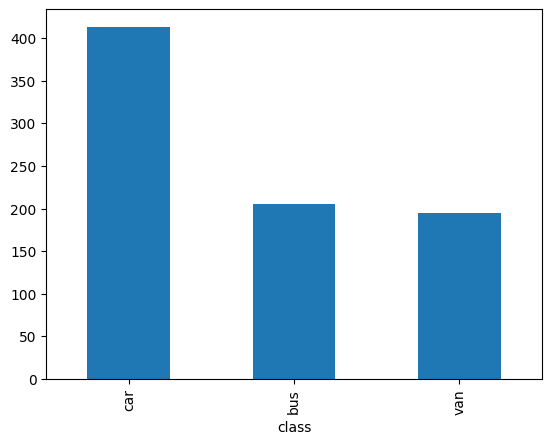

In [50]:
# Graph of the Count of the class variable.
vehicle_shape['class'].value_counts().plot(kind='bar')

## Correlation

<Axes: >

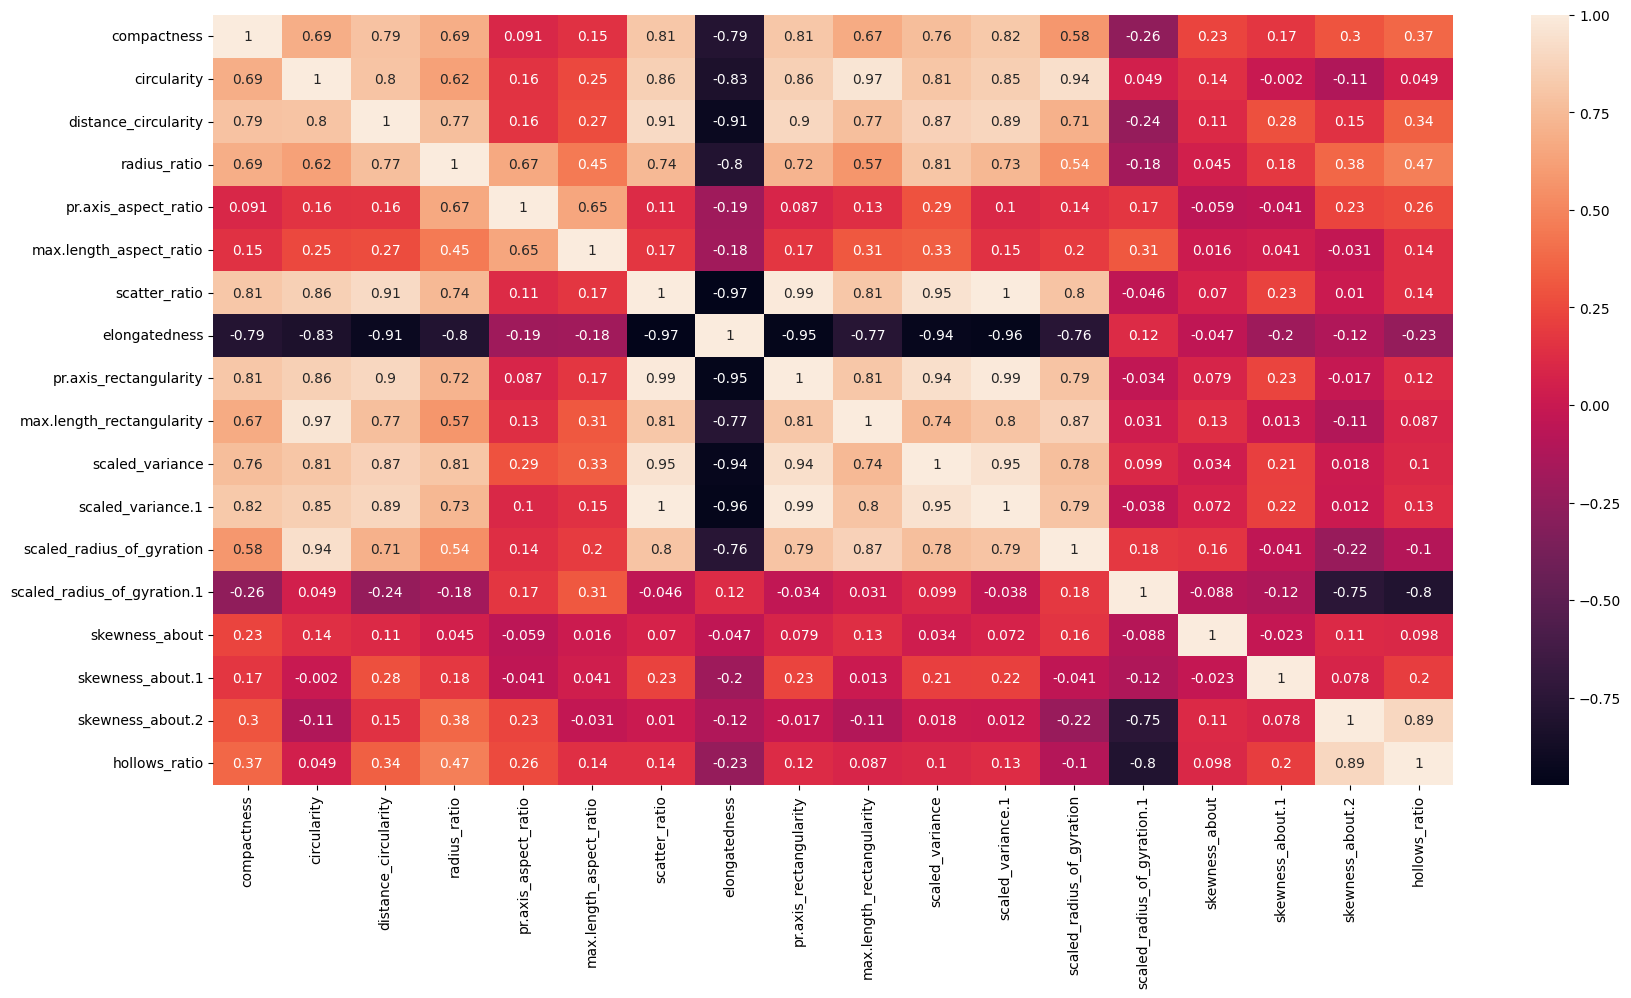

In [51]:
# Heatmap of the correlation between the columns.
plt.figure(figsize=(20,10))
sns.heatmap(vehicle_shape.drop('class', axis=1).corr(), annot=True)

In [52]:
# We will drop elongatedness, since it is highly correlated with many variables.
vehicle_shape.drop('elongatedness', axis=1, inplace=True)

<Axes: >

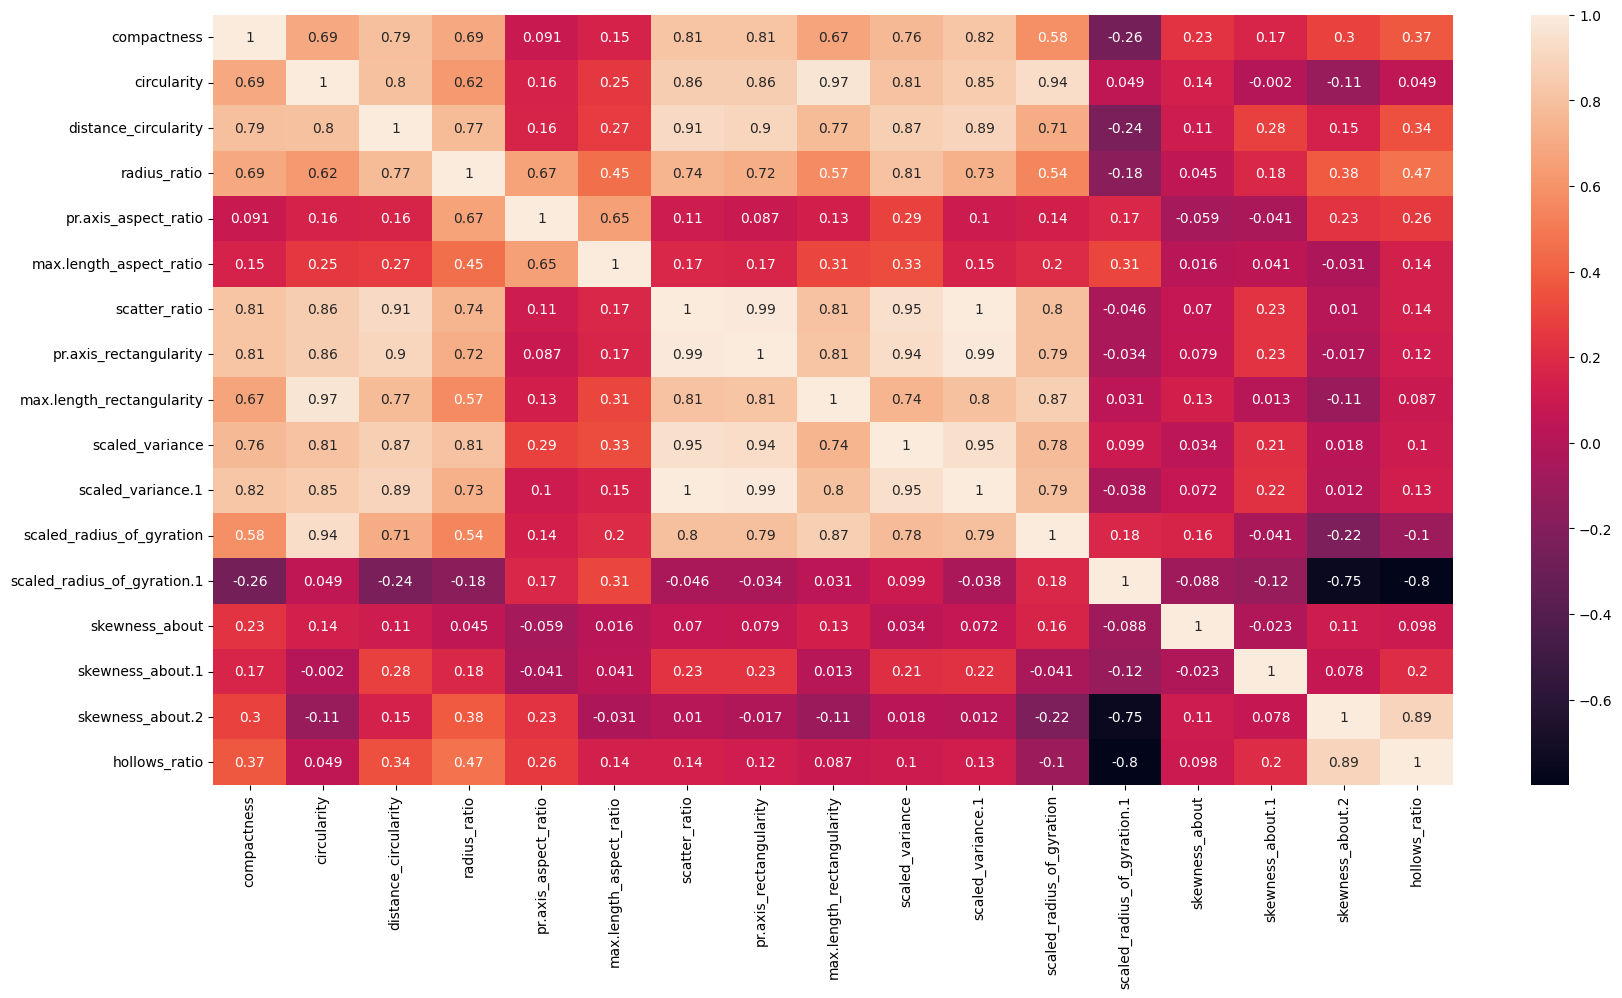

In [53]:
# Check again the heatmap of the correlation between the columns.
plt.figure(figsize=(20,10))
sns.heatmap(vehicle_shape.drop('class', axis=1).corr(), annot=True)

## Distribution

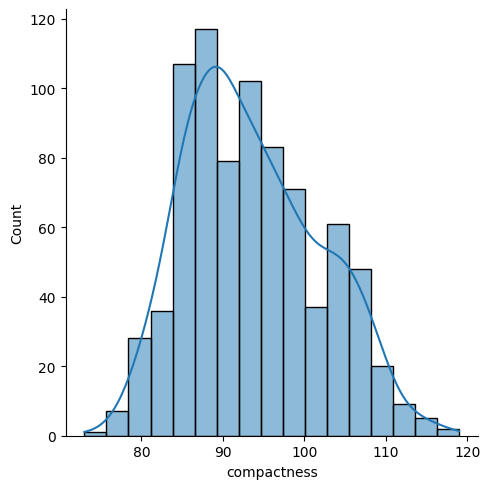

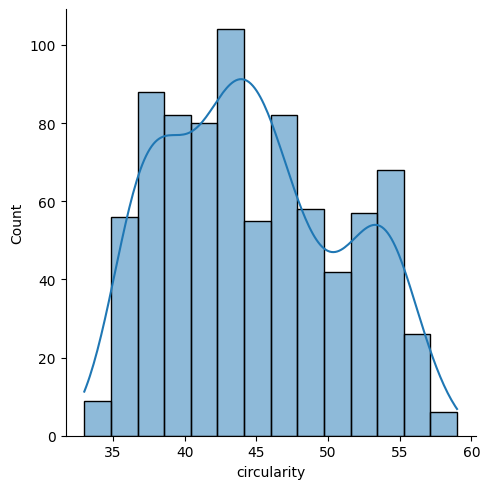

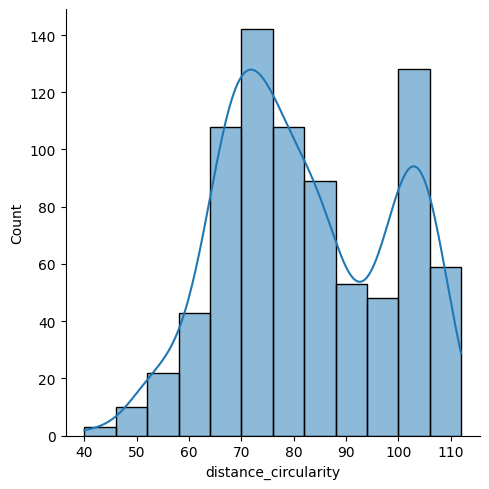

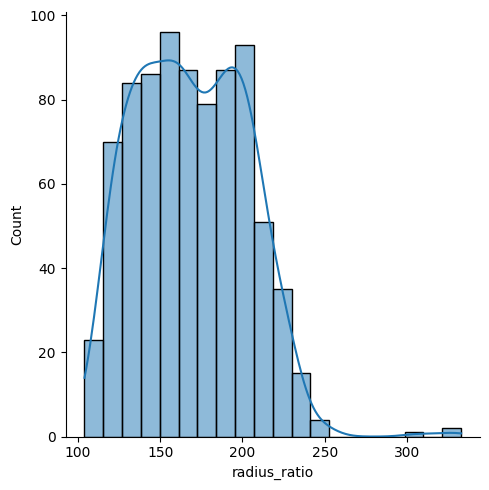

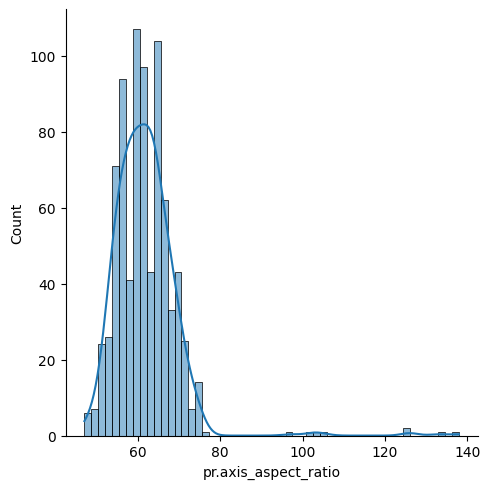

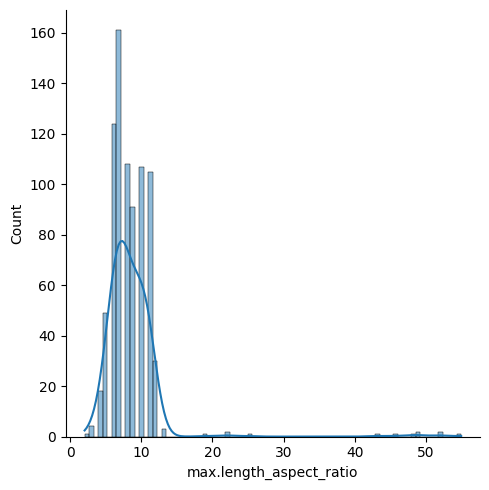

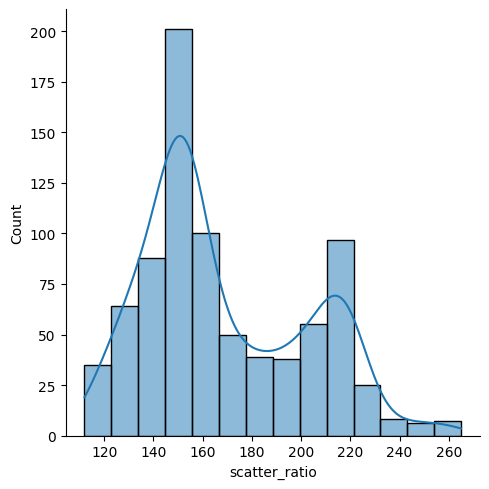

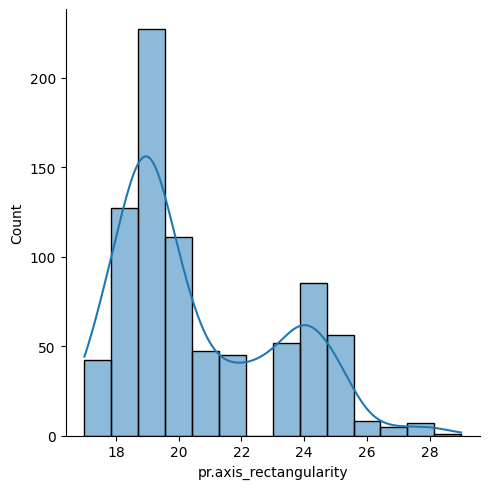

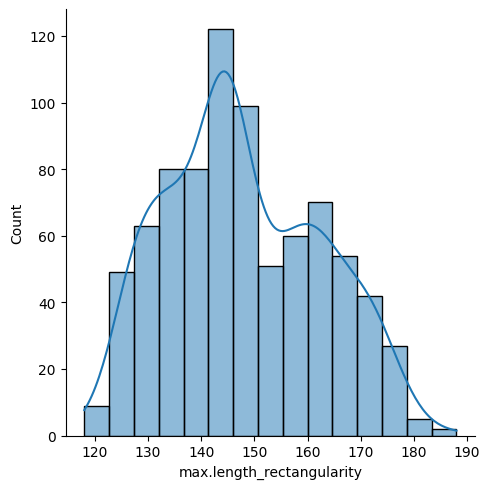

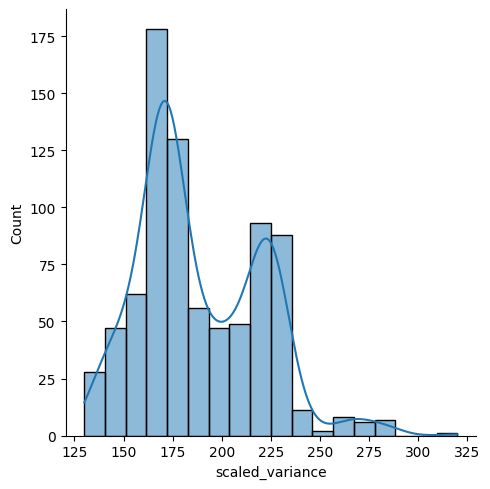

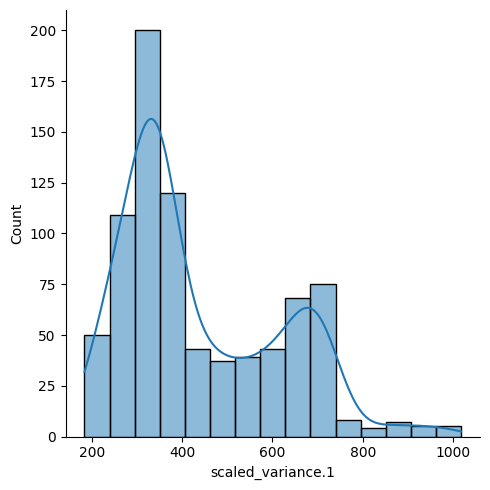

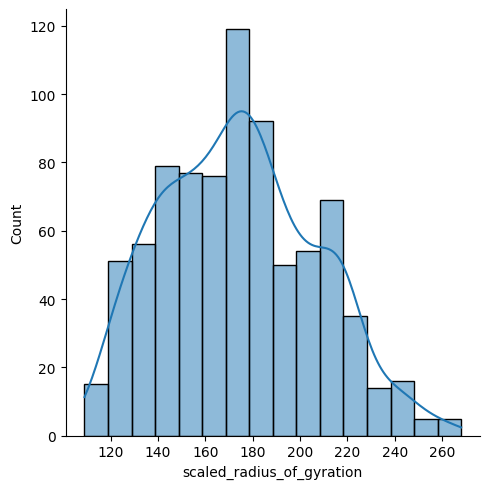

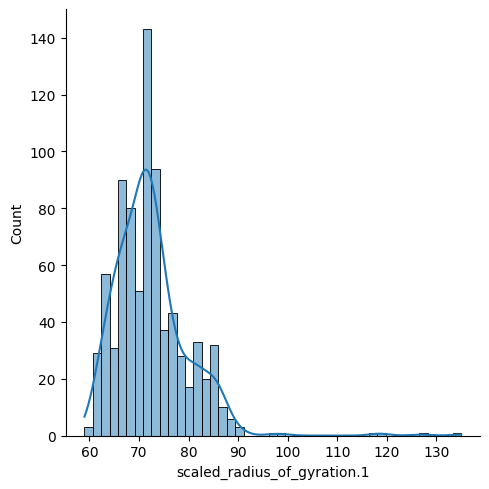

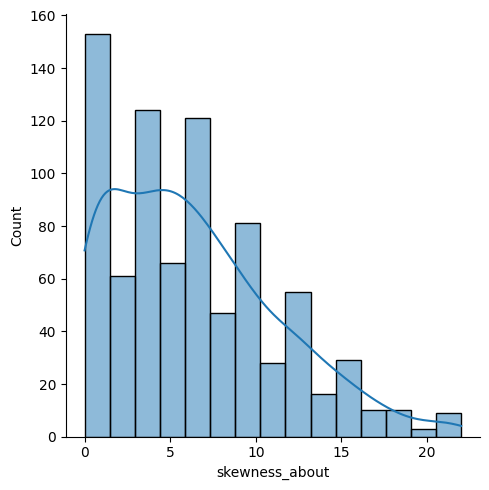

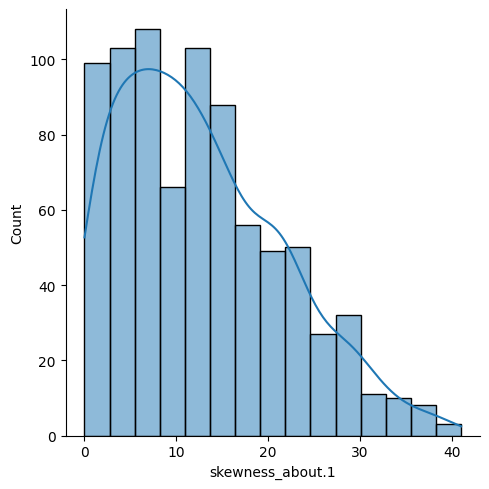

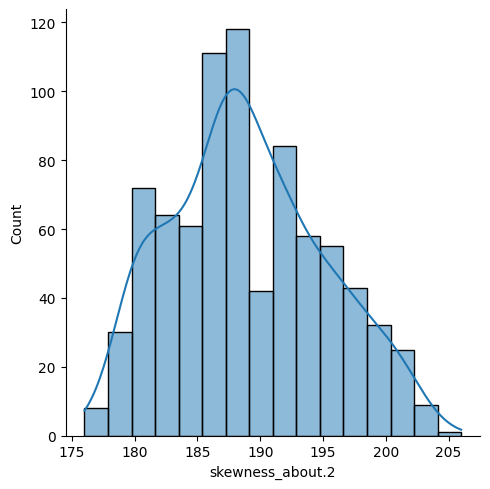

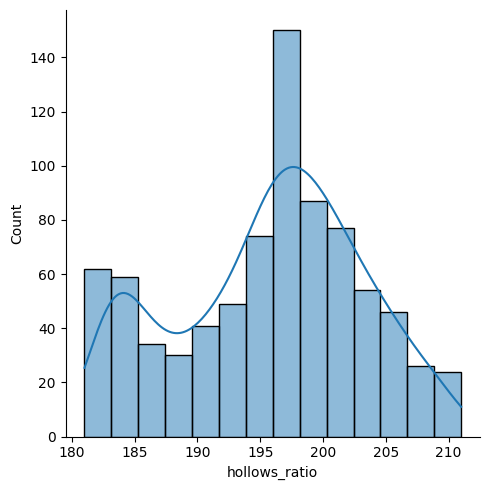

In [54]:
# Distplot of the columns, except for the class column, that is categorical.
for col in vehicle_shape.columns:
    if col != 'class':
        sns.displot(vehicle_shape[col], kde=True)
        plt.show()

## Boxplot

<Axes: >

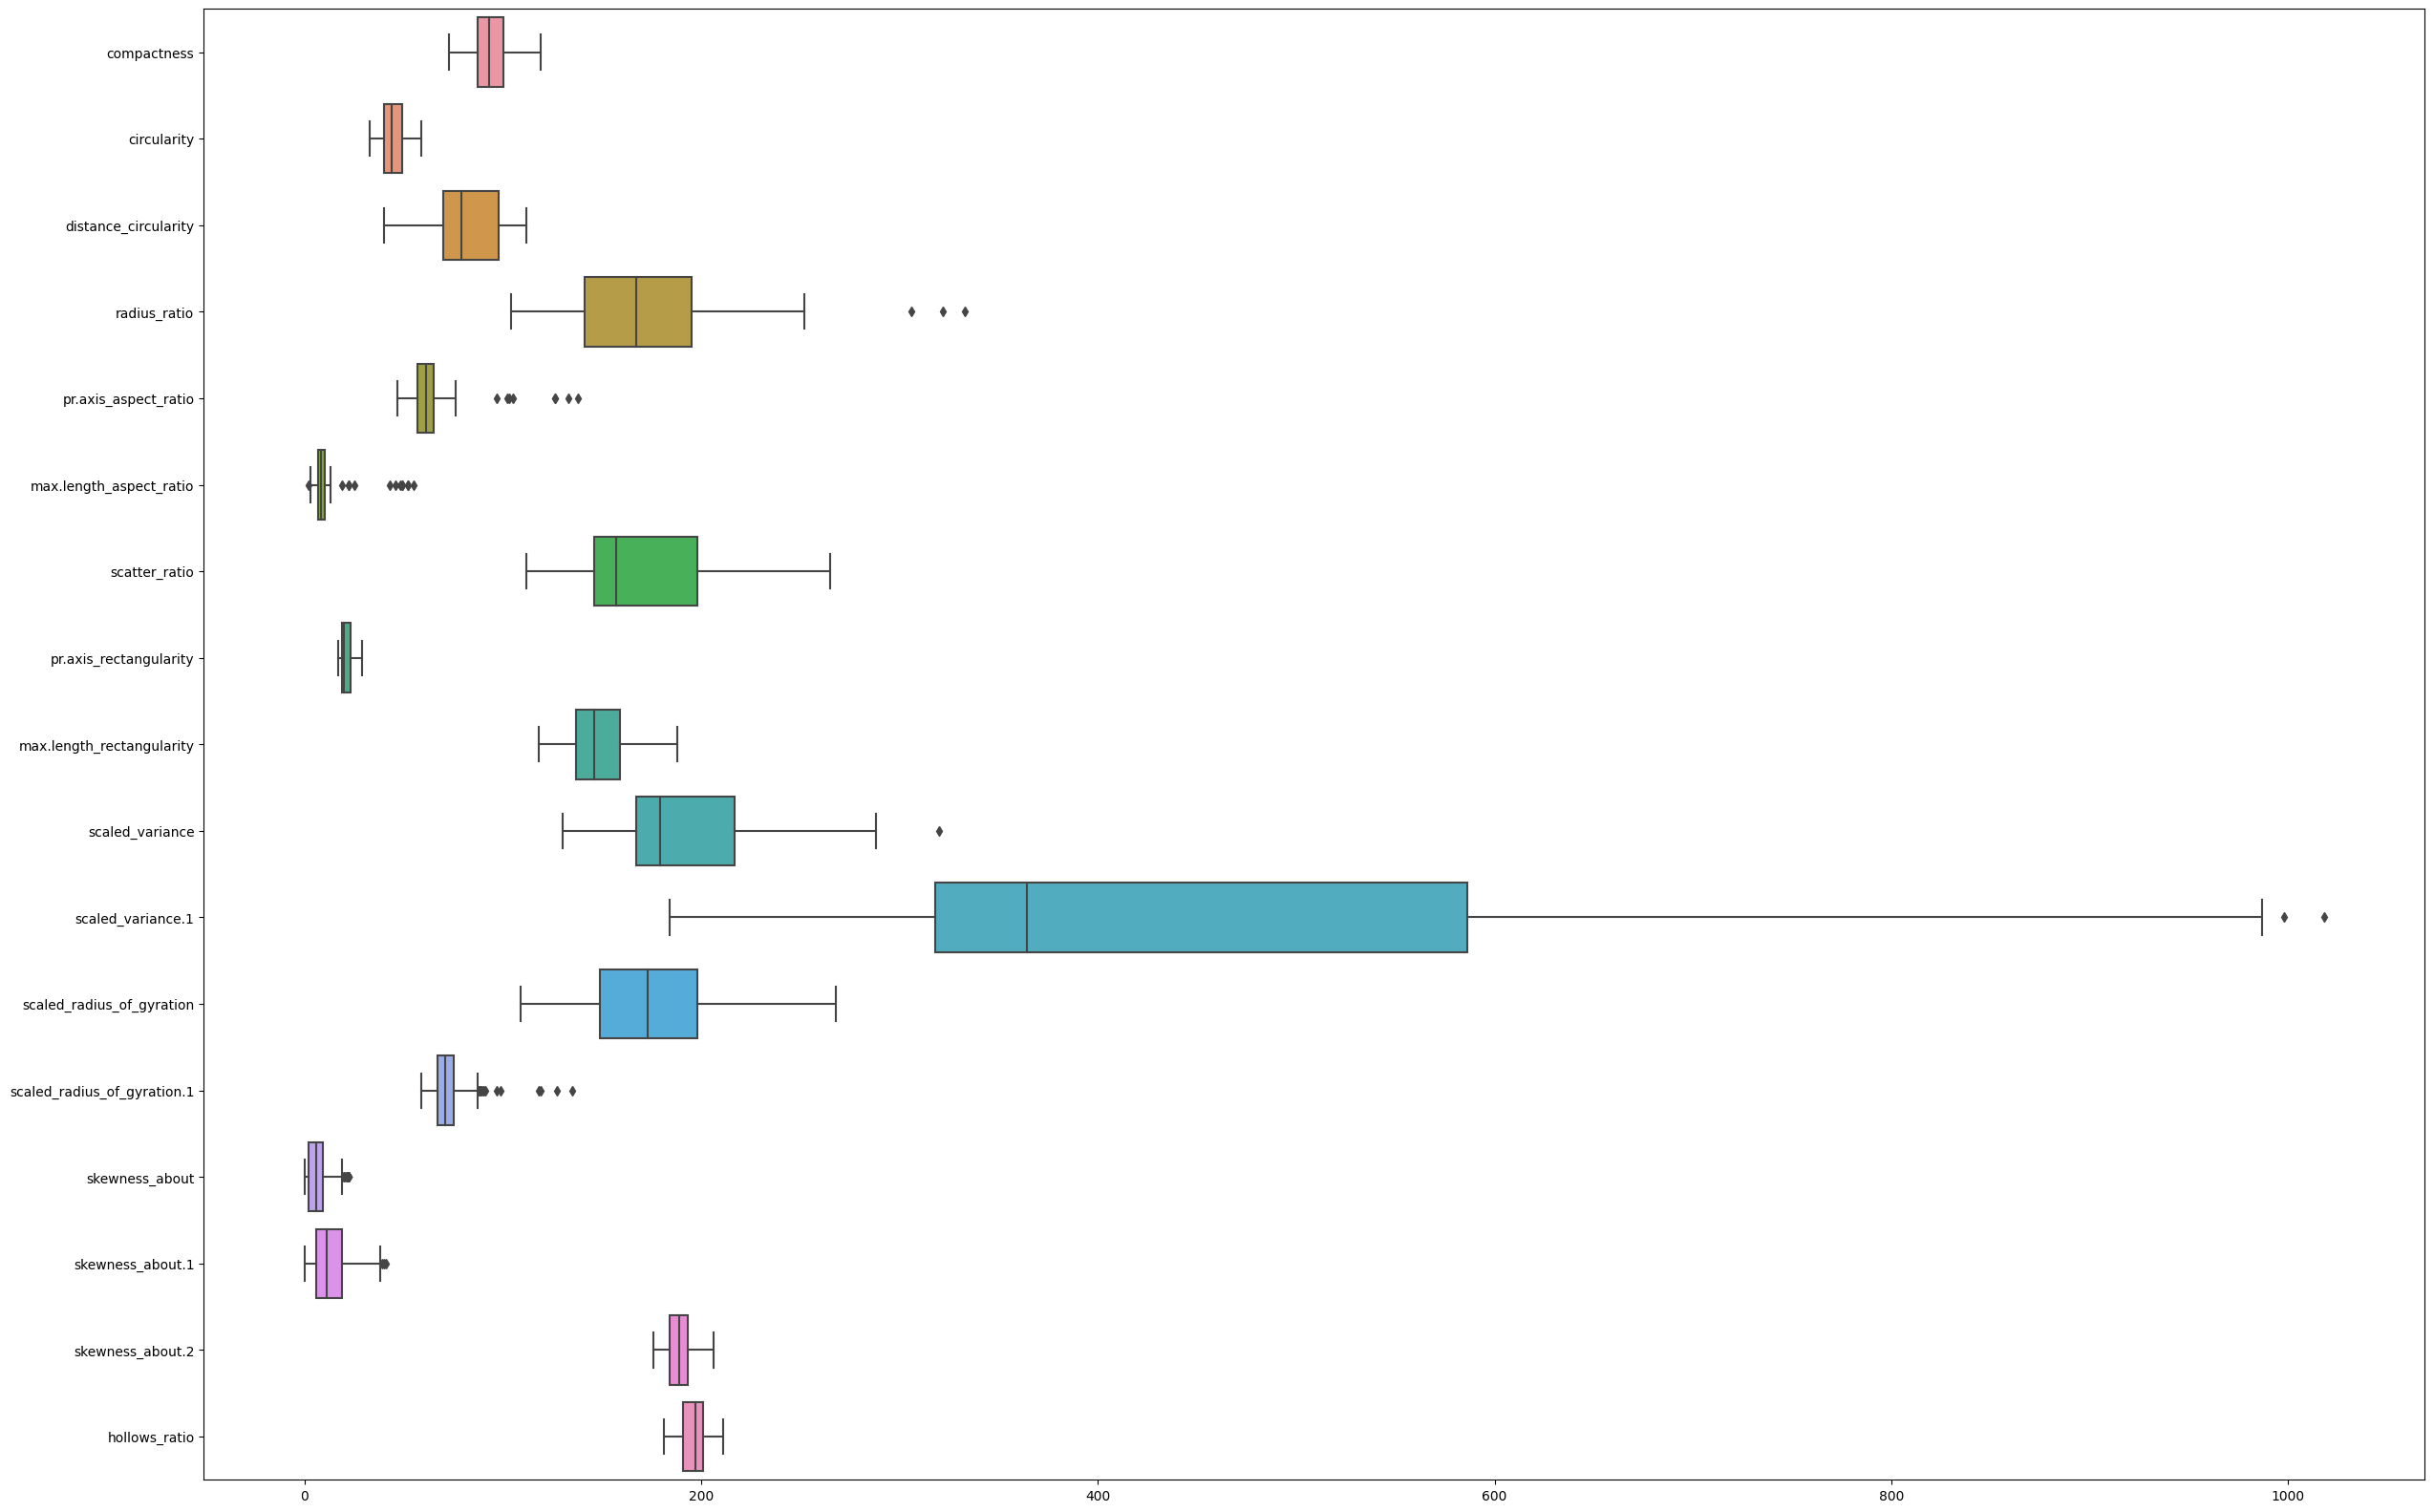

In [55]:
# Make box plot of the columns, except for the class column, that is categorical.
plt.figure(figsize= (30,20))
sns.boxplot(data=vehicle_shape.drop('class', axis=1),orient="h")

<Axes: >

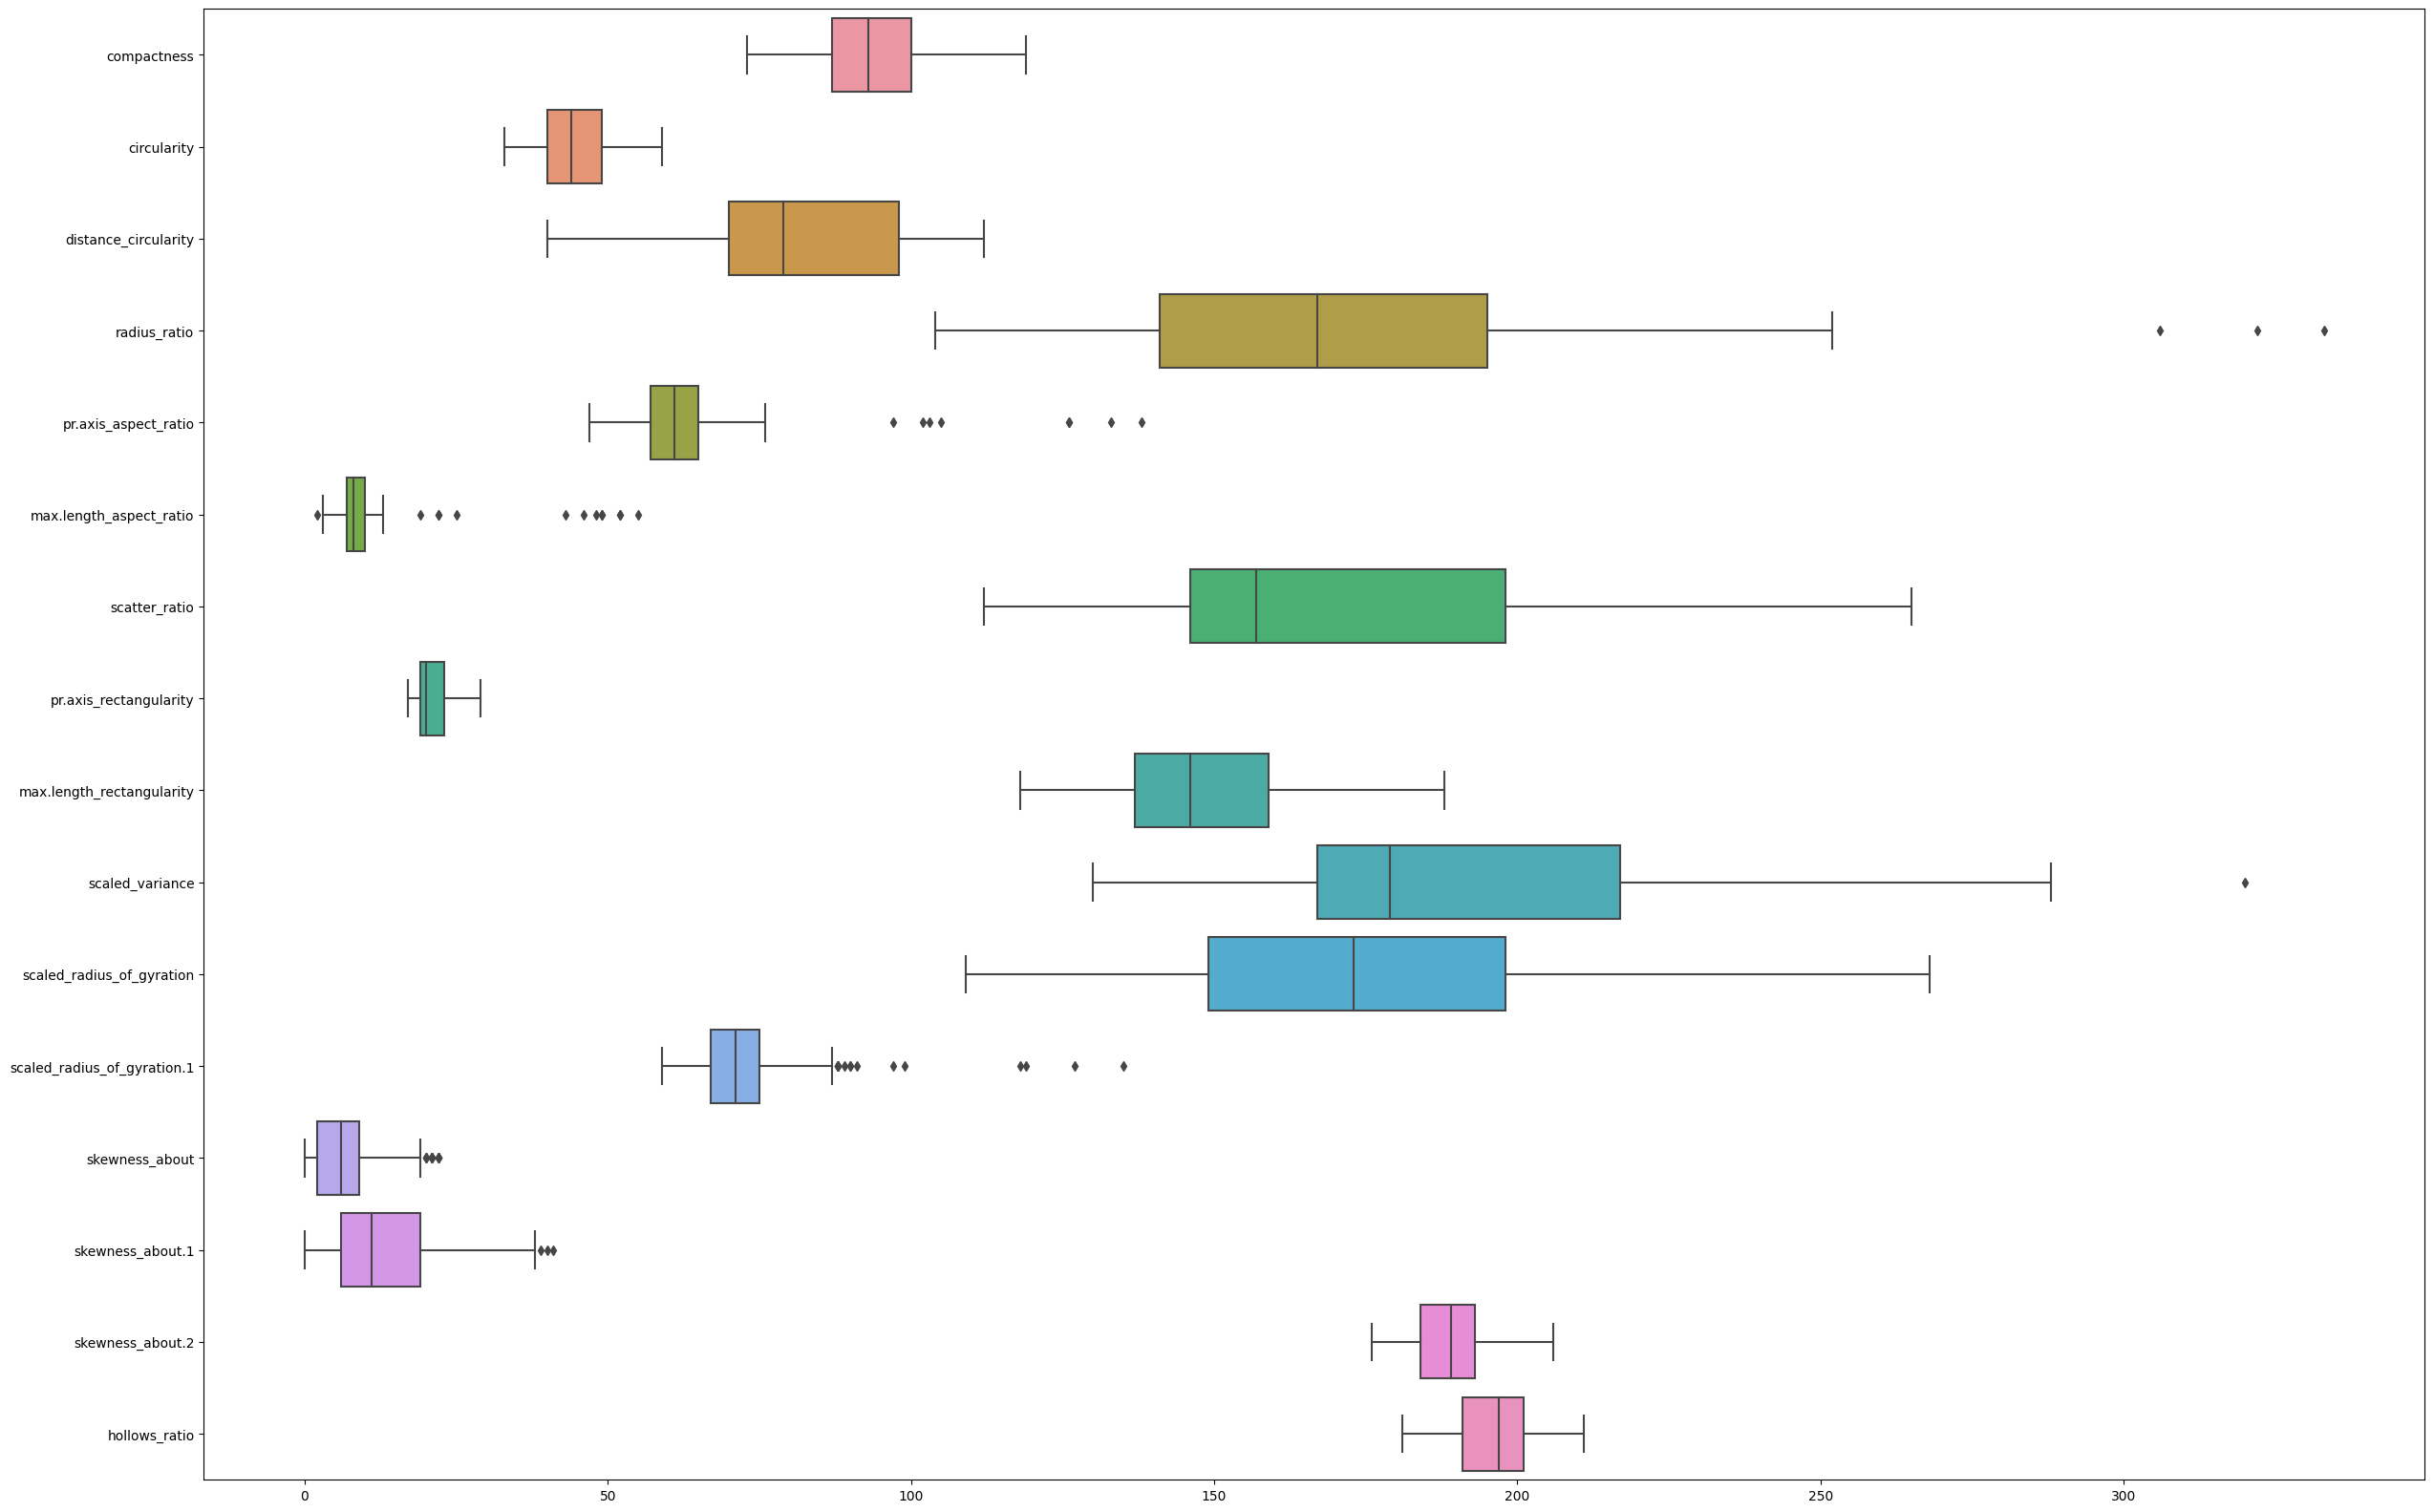

In [56]:
# Let's make the graph without scaled_variance.1 that has a very high value.
plt.figure(figsize= (30,20))
sns.boxplot(data=vehicle_shape.drop(['class', 'scaled_variance.1'], axis=1),orient="h")

## Skewness

In [57]:
# Get the skewness of the columns, except for class column.
vehicle_shape.drop('class', axis=1).skew()

compactness                    0.386048
circularity                    0.272723
distance_circularity           0.114244
radius_ratio                   0.396129
pr.axis_aspect_ratio           3.832899
max.length_aspect_ratio        6.698420
scatter_ratio                  0.596913
pr.axis_rectangularity         0.759483
max.length_rectangularity      0.271183
scaled_variance                0.629144
scaled_variance.1              0.822734
scaled_radius_of_gyration      0.266943
scaled_radius_of_gyration.1    2.156717
skewness_about                 0.782756
skewness_about.1               0.671462
skewness_about.2               0.255880
hollows_ratio                 -0.229941
dtype: float64

## Scaling

In [58]:
# Scale all the data to be fed to the model. 
# Another option is to use the min max scaler.
scaler = StandardScaler()
vehicle_shape_scaled = scaler.fit_transform(vehicle_shape.drop('class', axis=1))

In [59]:
vehicle_shape_scaled

array([[ 0.16323063,  0.52040788,  0.06066872, ...,  0.37128716,
        -0.3218087 ,  0.17183708],
       [-0.32287376, -0.61912319,  0.12406675, ...,  0.14710858,
         0.00340009,  0.44231829],
       [ 1.2569655 ,  0.84598818,  1.51882349, ..., -0.41333788,
        -0.1592043 ,  0.03659647],
       ...,
       [ 1.5000177 ,  1.49714879,  1.20183332, ..., -0.97378433,
        -0.3218087 ,  0.7127995 ],
       [-0.93050425, -1.43307395, -0.25632145, ...,  1.38009078,
         0.16600449, -0.09864413],
       [-1.05203035, -1.43307395, -1.01709784, ...,  0.59546574,
        -0.4844131 , -0.77484716]])

In [60]:
# Convert back to a dataframe.
vehicle_shape_scaled = pd.DataFrame(vehicle_shape_scaled, columns=vehicle_shape.drop('class', axis=1).columns)

# Get the first 5 rows.
vehicle_shape_scaled.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531


# Train and test

In [61]:
# Split the data into train and test.
# 25% of the data will be used for testing.
# Random state is set to 42.
X_train, X_test, y_train, y_test = train_test_split(vehicle_shape_scaled, vehicle_shape['class'], test_size=0.25, random_state=42)

# Machine Learning

## Support vector machine

In [62]:
# Train a support vector machine and get the accuracy on the test set.
svc_model = SVC()

# Fit the model to the train set.
svc_model.fit(X_train, y_train)

# Print the accuracy score of the model on the test set, using % format.
print(f'The accuracy of the model was: {svc_model.score(X_test, y_test)*100:.2f}%')

The accuracy of the model was: 98.53%


## K-fold cross validation.

In [63]:
# Perform K-fold cross validation and get the cross validation score of the model.
kfold = cross_val_score(SVC(), vehicle_shape_scaled, vehicle_shape['class'], cv=10)

# Print the mean of the kfold scores rounded to 2 decimal places.
print(f'The mean of the kfold scores was: {kfold.mean()*100:.2f}% with a Standard deviation of {kfold.std()*100:.2f}%')

The mean of the kfold scores was: 96.80% with a Standard deviation of 1.24%


## PCA

In [64]:
# Do Principal Component Analysis on the data.
from sklearn.decomposition import PCA
PCA_model = PCA(n_components=0.95)

# Fit the model to the data.
PCA_model.fit_transform(vehicle_shape_scaled)

array([[ 0.42225452, -0.14852832,  0.94093892, ...,  0.0483021 ,
        -0.71384453, -0.88279437],
       [-1.49090976, -0.41885909, -0.36678539, ...,  0.68691248,
        -0.56151288,  0.35223918],
       [ 3.60833721,  0.24213469,  0.03192197, ...,  0.76030207,
         0.69432103, -0.01666298],
       ...,
       [ 4.62300039,  0.05892432,  0.46331836, ..., -1.37346715,
        -0.13934558,  0.59666203],
       [-3.07319299, -1.01080158, -0.32476359, ..., -0.02962405,
        -0.3657039 , -0.24347626],
       [-4.37885619,  0.31381741, -0.57807288, ..., -0.1296304 ,
        -0.24531926,  0.04613722]])

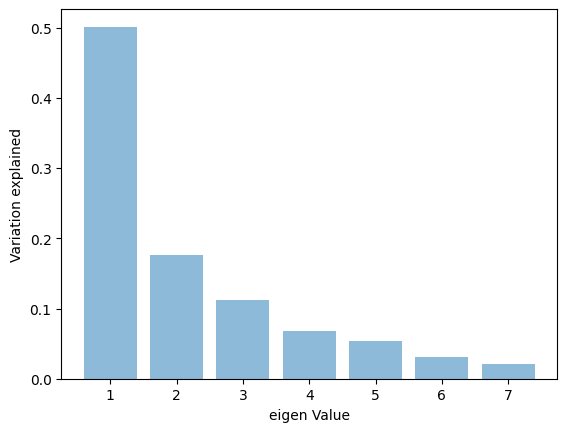

In [65]:
# Plot the pca explained variance ratio.
plt.bar(list(range(1,8)),PCA_model.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

Text(0, 0.5, 'Cumulative explained variance')

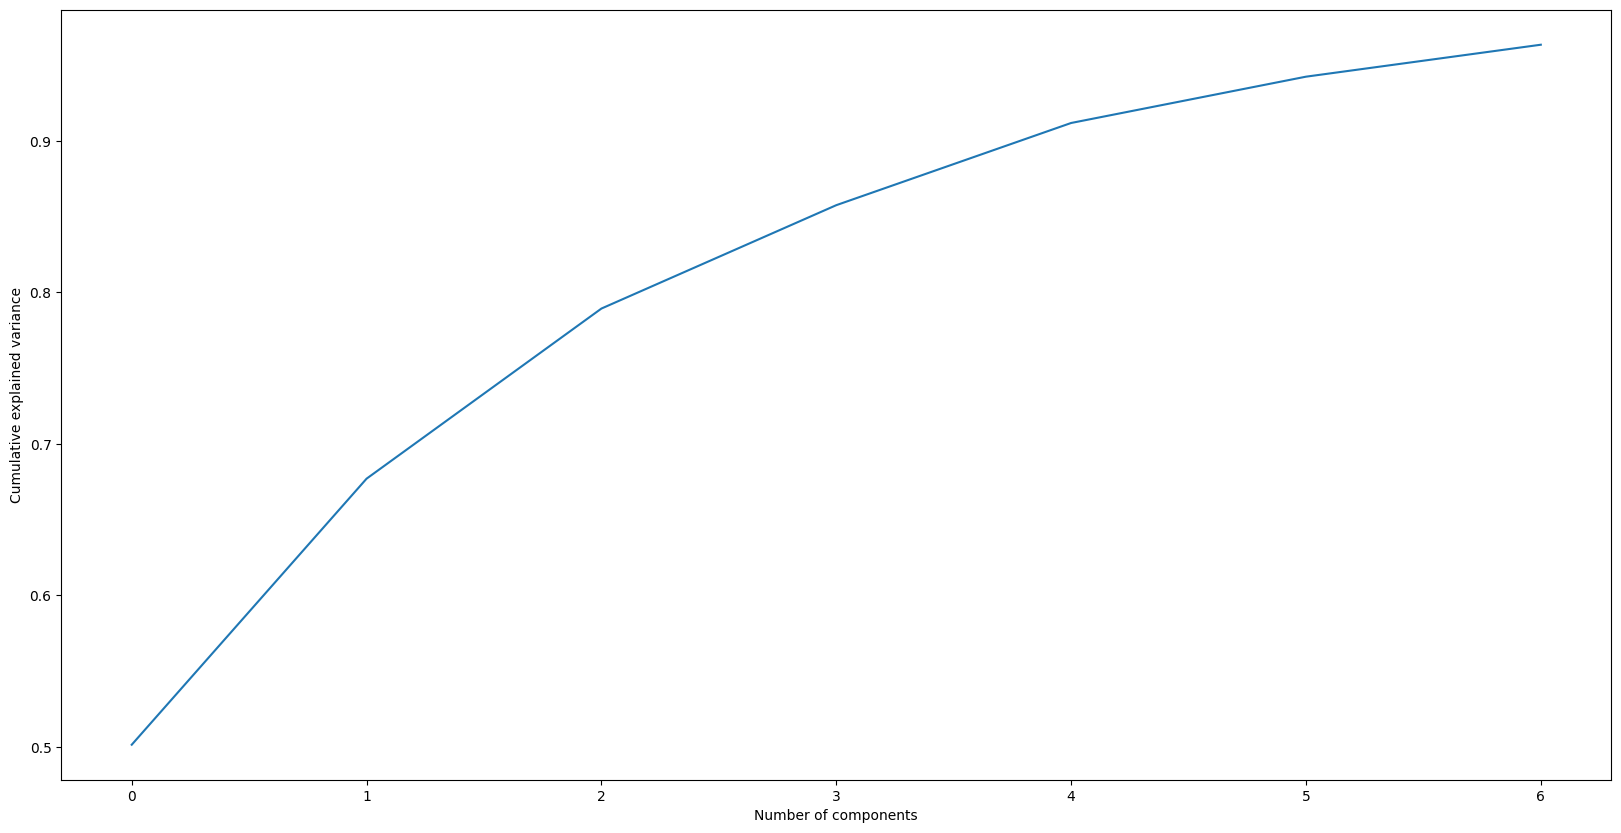

In [66]:
# Now the cumulative variance explained.
plt.figure(figsize=(20,10))
plt.plot(np.cumsum(PCA_model.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [67]:
# Back to a dataframe.
PCA_model_df = pd.DataFrame(PCA_model.fit_transform(vehicle_shape_scaled))

# Get the first 5 rows.
PCA_model_df.head()

,0,1,2,3,4,5,6
0,0.422255,-0.148528,0.940939,0.167815,0.048302,-0.713845,-0.882794
1,-1.490910,-0.418859,-0.366785,0.215774,0.686912,-0.561513,0.352239
2,3.608337,0.242135,0.031922,1.193652,0.760302,0.694321,-0.016663
3,-1.596610,-2.818146,0.178212,0.377787,-0.361730,-0.498921,0.452659
4,0.812998,5.119283,11.371626,0.071384,3.301269,-0.496293,2.583529


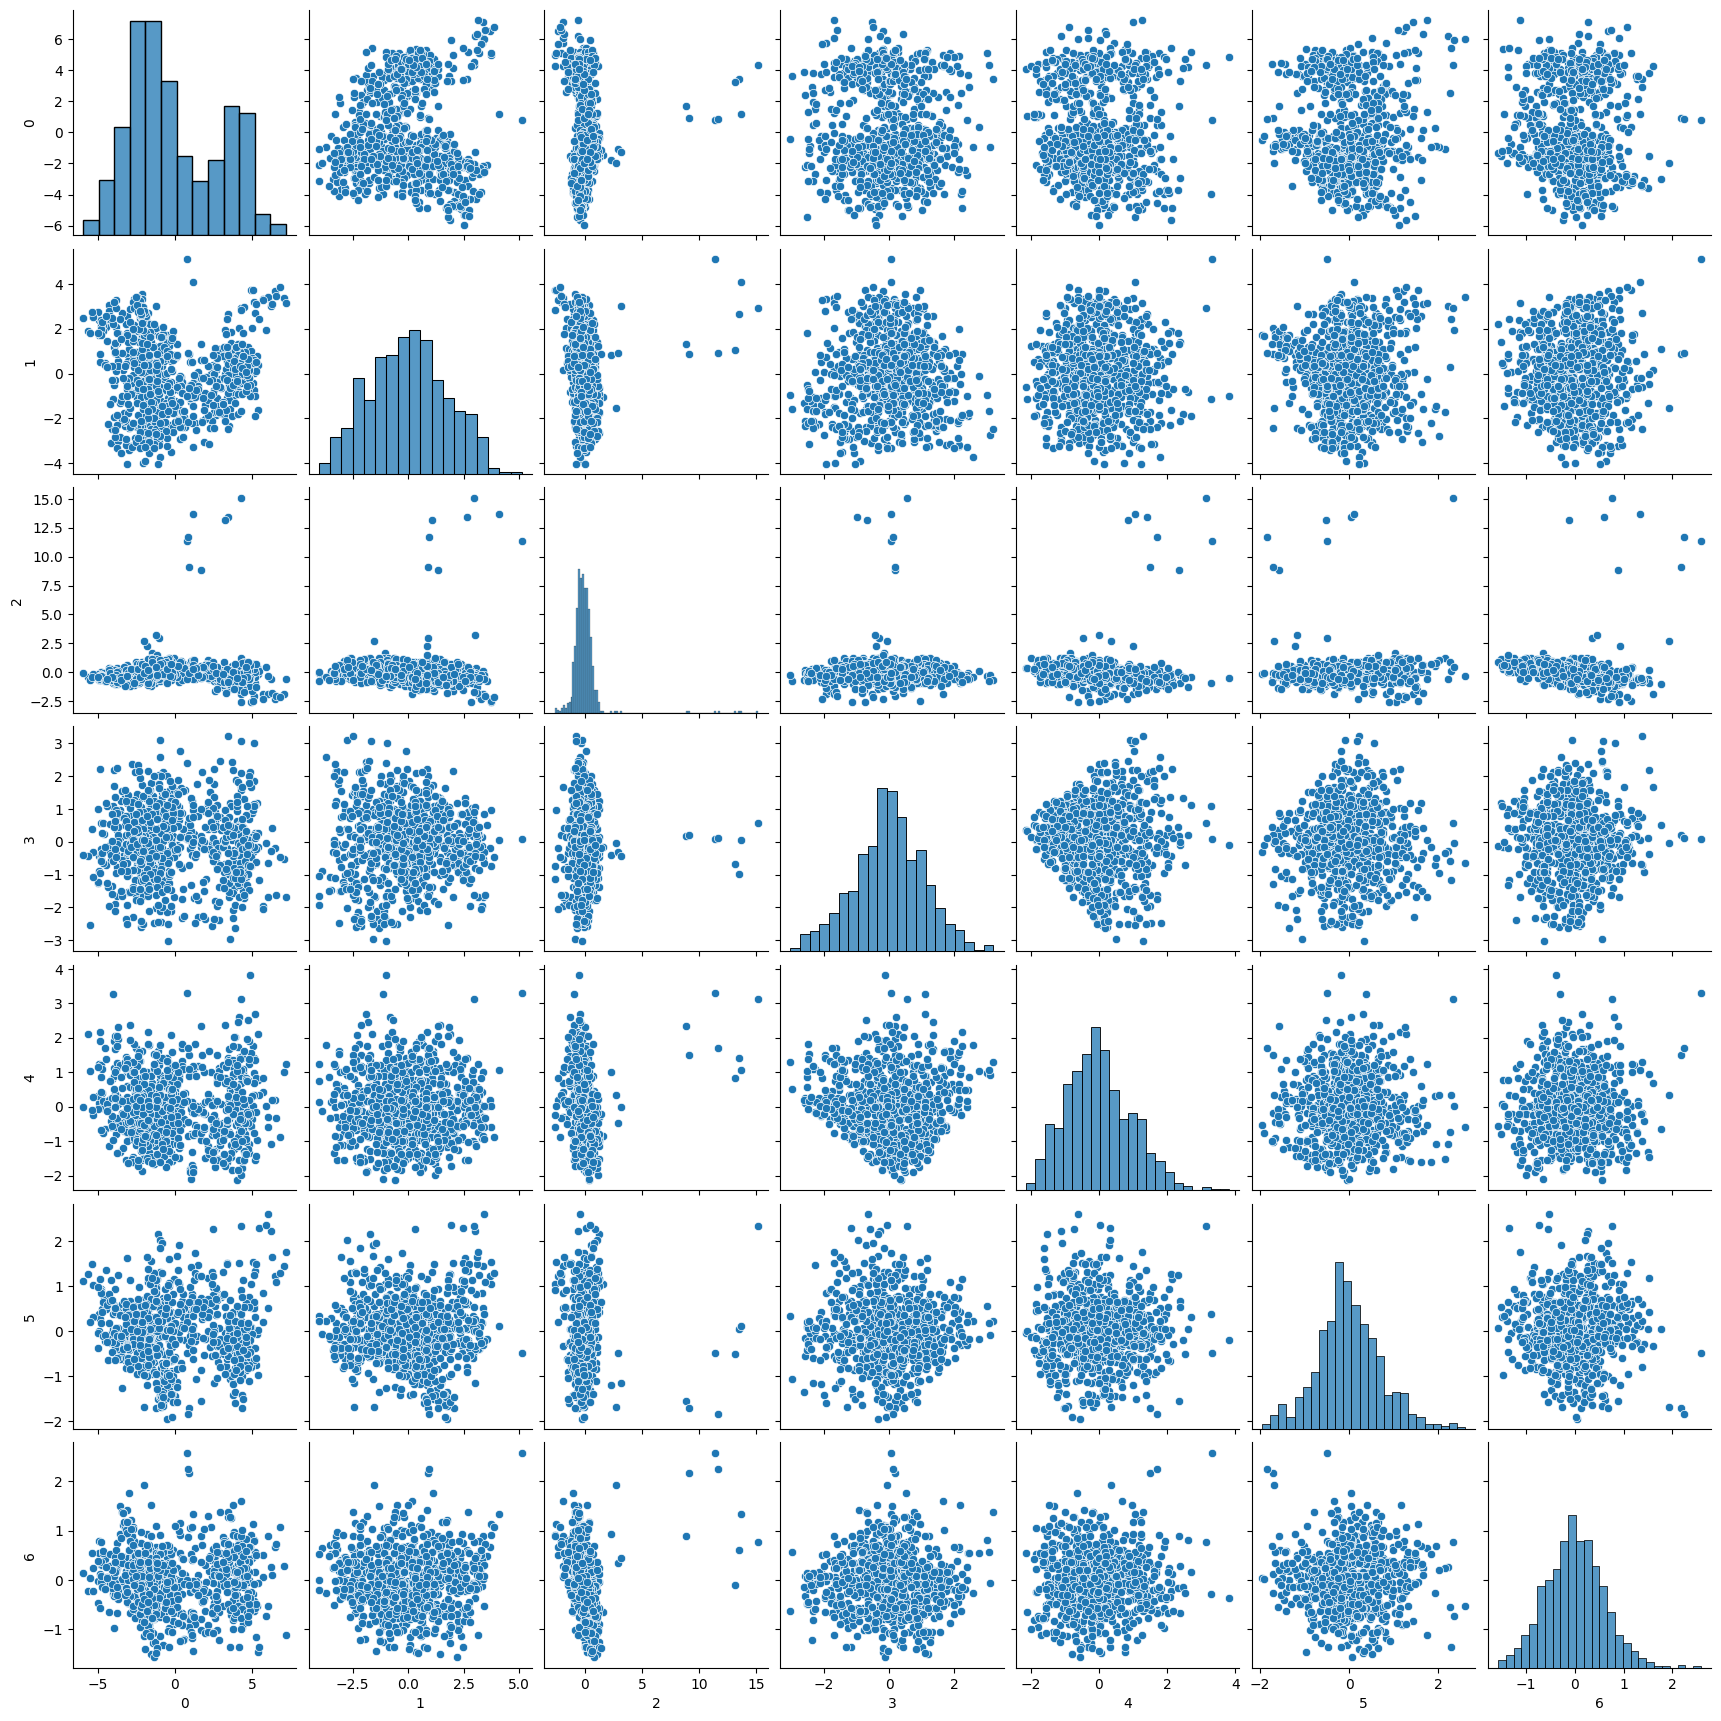

In [68]:
# Get a pairplot of the data.
sns.pairplot(PCA_model_df)

## Train test split on reductioned data.

In [69]:
# Split the data into train and test.
# 25% of the data will be used for testing.
# Random state is set to 42.
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(PCA_model_df, vehicle_shape['class'], test_size=0.25, random_state=42)

## Support vector machine on reductioned data.

In [70]:
# Train a support vector machine and get the accuracy on the test set.
svc_model_pca = SVC()

# Fit the model to the train set.
svc_model_pca.fit(X_train_pca, y_train_pca)

SVC()

In [71]:
# Print the accuracy score of the model on the test set, using % format.
print(f'The accuracy of the model was: {svc_model_pca.score(X_test_pca, y_test_pca)*100:.2f}%')

The accuracy of the model was: 91.67%


## Kfold validation on reductioned data.

In [72]:
# Let's do k-fold cross validation and get the cross validation score of the model.
kfold_pca = cross_val_score(SVC(), PCA_model_df, vehicle_shape['class'], cv=10)

# Print the mean of the kfold scores rounded to 2 decimal places.
print(f'The mean of the kfold scores was: {kfold_pca.mean()*100:.2f}% with a Standard deviation of {kfold_pca.std()*100:.2f}%')

The mean of the kfold scores was: 90.28% with a Standard deviation of 3.57%


# Conclusion

In [74]:
# Print the accuracy score of the models with and without PCA, and with and without Kfold validation.
print(f'The accuracy of the model without PCA was: {svc_model.score(X_test, y_test)*100:.2f}%')
print(f'The accuracy of the model without PCA and with Kfold was: {kfold.mean()*100:.2f}%')
print(f'The accuracy of the model with PCA was: {svc_model_pca.score(X_test_pca, y_test_pca)*100:.2f}%')
print(f'The accuracy of the model with PCA and with Kfold was: {kfold_pca.mean()*100:.2f}%')

The accuracy of the model without PCA was: 98.53%
The accuracy of the model without PCA and with Kfold was: 96.80%
The accuracy of the model with PCA was: 91.67%
The accuracy of the model with PCA and with Kfold was: 90.28%


In [22]:
class MachineLearning:
    def __init__(self):
        pass

    def definition():
        print('''
        Machine learning is the study of computer algorithms that improve automatically through experience. 
        It is seen as a subset of artificial intelligence. Machine learning algorithms build a model based on sample data, 
        known as "training data", in order to make predictions or decisions without being explicitly programmed to do so. 
        Machine learning algorithms are used in a wide variety of applications, such as email filtering and computer vision, 
        where it is difficult or infeasible to develop a conventional algorithm for effectively performing the task.
        ''')

    def methods():
        print('''
        There are 3 main types of machine learning algorithms:
        1. Supervised learning
        2. Unsupervised learning
        3. Reinforcement learning
        ''')

    def supervised_learning():
        print('''
        Supervised learning is the machine learning task of learning a function that maps an input to an output based on example input-output pairs. 
        It infers a function from labeled training data consisting of a set of training examples. 
        In supervised learning, each example is a pair consisting of an input object (typically a vector) and a desired output value (also called the supervisory signal). 
        A supervised learning algorithm analyzes the training data and produces an inferred function, which can be used for mapping new examples. 
        An optimal scenario will allow for the algorithm to correctly determine the class labels for unseen instances. 
        This requires the learning algorithm to generalize from the training data to unseen situations in a "reasonable" way (see inductive bias).
        ''')

    def unsupervised_learning():
        print('''
        Unsupervised learning is a type of machine learning algorithm used to draw inferences from datasets consisting of input data without labeled responses. 
        The most common unsupervised learning method is cluster analysis, which is used for exploratory data analysis to find hidden patterns or grouping in data. 
        The clusters are modeled using a measure of similarity which is defined upon metrics such as Euclidean or probabilistic distance.
        ''')

    def reinforcement_learning():
        print('''
        Reinforcement learning is an area of machine learning concerned with how software agents ought to take actions in an environment in order to maximize the notion of cumulative reward. 
        Reinforcement learning is one of three basic machine learning paradigms, alongside supervised learning and unsupervised learning.
        ''')

    def supervised_learning_algorithms():
        print('''
        There are 2 main types of supervised learning algorithms:
        1. Classification
        2. Regression
        ''')
    
    def classification():
        print('''
        In machine learning and statistics, classification is the problem of identifying to which of a set of categories (sub-populations) a new observation belongs,
        on the basis of a training set of data containing observations (or instances) whose category membership is known.
        ''')

    def regression():
        print('''
        In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships between a dependent variable (often called the 'outcome variable') and one or more independent variables (often called 'predictors', 'covariates', or 'features').
        ''')

    def unsupervised_learning_algorithms():
        print('''
        There are 2 main types of unsupervised learning algorithms:
        1. Clustering
        2. Association
        ''')

    def clustering():
        print('''
        Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) 
        to each other than to those in other groups (clusters). It is a main task of exploratory data mining, and a common technique for statistical data analysis, 
        used in many fields, including pattern recognition, image analysis, information retrieval, bioinformatics, data compression, computer graphics and machine learning.
        ''')
    
    def association():
        print('''
        Association rule learning is a rule-based machine learning method for discovering interesting relations between variables in large databases. 
        It is intended to identify strong rules discovered in databases using some measures of interestingness.
        ''')

    def reinforcement_learning_algorithms():
        print('''
        There are 2 main types of reinforcement learning algorithms:
        1. Value-based
        2. Policy-based
        ''')
    
    def value_based():
        print('''
        Value-based methods directly estimate the optimal value function or optimal policy, without having to learn the intermediate representation (policy or value function).
        ''')
    
    def policy_based():
        print('''
        Policy-based methods directly learn the optimal policy, without having to learn the intermediate representation (policy or value function).
        ''')
    
    def machine_learning_algorithms():
        print('''
        There are 2 main types of machine learning algorithms:
        1. Batch learning
        2. Online learning
        ''')
    
    def batch_learning():
        print('''
        Batch learning is a machine learning technique in which a model is trained using all of the training data at once. 
        It is the traditional machine learning approach. 
        Batch learning is still used today, but it is being supplanted by online learning, which is more suitable for large datasets.
        ''')
    
    def online_learning():
        print('''
        Online machine learning is a method of machine learning in which data becomes available in a sequential order and is used to update our best predictor for future data at each step, 
        as opposed to batch learning techniques which generate the best predictor by learning on the entire training data set at once. 
        Online learning is a common technique used in areas of machine learning where it is computationally infeasible to train over the entire dataset, 
        requiring the need of out-of-core algorithms. 
        Online learning is closely related to the fields of data stream mining and incremental learning.
        ''')
    
    def machine_learning_models():
        print('''
        There are 2 main types of machine learning models:
        1. Discriminative
        2. Generative
        ''')

    def discriminative():
        print('''
        Discriminative models are a class of models used in machine learning for modeling the dependence of an unobserved variable y on an observed variable x. 
        They are typically used for modeling conditional probability distributions and are closely related to the field of supervised learning, 
        where an algorithm is tasked with learning a model from training data.
        ''')

    def generative():
        print('''
        Generative models are a class of models used in machine learning for modeling the distribution of observed data, 
        typically conditional on some other data. 
        They are typically used for modeling probability distributions and generating new data from existing data.
        ''')


In [ ]:
class Statistics:
    def __init__(self) -> None:
        pass

    def definition():
        print('''
        Statistics is the discipline that concerns the collection, organization, analysis, interpretation, and presentation of data. 
        In applying statistics to a scientific, industrial, or social problem, it is conventional to begin with a statistical population or a statistical model to be studied. 
        Populations can be diverse groups of people or objects such as "all people living in a country" or "every atom composing a crystal". 
        Statistics deals with every aspect of data, including the planning of data collection in terms of the design of surveys and experiments.
        ''')
    
    def types_of_statistics():
        print('''
        There are 2 main types of statistics:
        1. Descriptive statistics
        2. Inferential statistics
        ''')
    
    def descriptive_statistics():
        print('''
        Descriptive statistics is the discipline of quantitatively describing the main features of a collection of data. 
        Descriptive statistics are distinguished from inferential statistics (or inductive statistics), in that descriptive statistics aim to summarize a sample, 
        rather than use the data to learn about the population that the sample of data is thought to represent. 
        This generally means that descriptive statistics, unlike inferential statistics, are not developed on the basis of probability theory.
        ''')
    
    def inferential_statistics():
        print('''
        Inferential statistics is the process of using data analysis to deduce properties of an underlying distribution of probability. 
        Inferential statistical analysis infers properties of a population, for example by testing hypotheses and deriving estimates. 
        It is assumed that the observed data set is sampled from a larger population.
        ''')

    def types_of_data():
        print('''
        There are 2 main types of data:
        1. Quantitative data
        2. Qualitative data
        ''')
    
    def quantitative_data():
        print('''
        Quantitative data is information about quantities, and therefore numbers, and therefore measurable. 
        Quantitative data is based on quantities obtained using a quantifiable measurement process. 
        In statistics, quantitative data is numerical and acquired through counting or measuring and contrasted with qualitative data sets, 
        which describe attributes of objects but do not contain numbers.
        ''')
    
    def qualitative_data():
        print('''
        Qualitative data is information about qualities; information that can't actually be measured. 
        Some examples of qualitative data are the softness of your skin, the grace with which you run, and the color of your eyes. 
        However, try telling Photoshop you can't measure color with numbers!
        ''')
    
    def types_of_variables():
        print('''
        There are 2 main types of variables:
        1. Discrete variable
        2. Continuous variable
        ''')
    
    def discrete_variable():
        print('''
        A discrete variable is a variable whose value is obtained by counting. 
        A discrete variable can be numeric or non-numeric. 
        A discrete variable is always numeric. 
        Examples of discrete variables include:
        1. The number of eggs that a hen lays
        2. The number of students who attend class every day
        3. The number of phone calls that you receive
        ''')

    def continuous_variable():
        print('''
        A continuous variable is a variable whose value is obtained by measuring. 
        A continuous variable can be numeric or non-numeric. 
        A continuous variable is always numeric. 
        Examples of continuous variables include:
        1. The height of a person
        2. The weight of a person
        3. The temperature in a room
        ''')

    def types_of_distributions():
        print('''
        There are 2 main types of distributions:
        1. Discrete distribution
        2. Continuous distribution
        ''')
    
    def discrete_distribution():
        print('''
        A discrete distribution is a statistical distribution that shows the probabilities of outcomes with finite values. 
        A discrete distribution is a statistical distribution that shows the probabilities of outcomes with finite values. 
        For example, a coin toss would be a discrete distribution because the outcome can be only two values: heads or tails. 
        A die roll would be a discrete distribution because the outcomes can only be the numbers 1 through 6.
        ''')

    def continuous_distribution():
        print('''
        A continuous distribution is a statistical distribution that has infinite possible values. 
        Continuous distributions are encountered in many scientific and engineering areas, including physics, chemistry, biology, engineering, finance, and economics. 
        The normal distribution, also called the Gaussian distribution, is a continuous distribution that is very important in science and engineering.
        ''')

    def bayes_theorem():
        print('''
        Bayes' theorem is a formula that describes how to update the probabilities of hypotheses when given evidence. 
        It follows simply from the axioms of conditional probability, but can be used to powerfully reason about a wide range of problems involving belief updates.
        ''')

    def bayes_theorem_formula():
        print('''
        P(A|B) = (P(B|A) * P(A)) / P(B)
        ''')
    
    def bayes_theorem_formula_explanation():
        print('''
        P(A|B) = Posterior probability
        P(B|A) = Likelihood
        P(A) = Prior probability
        P(B) = Marginal likelihood
        ''')

    def bayes_theorem_example():
        print('''
        Let's say we have a test to determine if a person has a certain disease. 
        The test is 99% accurate, meaning that the probability of a false positive is 1%. 
        The probability of a false negative is zero. 
        We also know that 1 in 10,000 people have this disease. 
        If we test a person and they test positive, what is the probability that they actually have the disease?
        ''')
    
    def normal_tendency():
        print('''
        Normal tendency is the tendency of a data set to cluster around a central value. 
        This central value is called the mean or the average. 
        The mean is the sum of all the values in the data set divided by the number of values in the data set. 
        The mean is also called the arithmetic mean or the average.
        ''')
    
    def normal_distribution():
        print('''
        A normal distribution is a type of probability distribution that is symmetric about the mean. 
        The normal distribution is a continuous probability distribution. 
        A normal distribution is the proper term for a probability bell curve.
        ''')
    



In [23]:
help(MachineLearning)

Help on class MachineLearning in module __main__:

class MachineLearning(builtins.object)
 |  Methods defined here:
 |  
 |  __init__(self)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  association()
 |  
 |  batch_learning()
 |  
 |  classification()
 |  
 |  clustering()
 |  
 |  definition()
 |  
 |  discriminative()
 |  
 |  generative()
 |  
 |  machine_learning_algorithms()
 |  
 |  machine_learning_models()
 |  
 |  methods()
 |  
 |  online_learning()
 |  
 |  policy_based()
 |  
 |  regression()
 |  
 |  reinforcement_learning()
 |  
 |  reinforcement_learning_algorithms()
 |  
 |  supervised_learning()
 |  
 |  supervised_learning_algorithms()
 |  
 |  unsupervised_learning()
 |  
 |  unsupervised_learning_algorithms()
 |  
 |  value_based()
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakr

In [20]:
MachineLearning.definition()


        Machine learning is the study of computer algorithms that improve automatically through experience. 
        It is seen as a subset of artificial intelligence. Machine learning algorithms build a model based on sample data, 
        known as "training data", in order to make predictions or decisions without being explicitly programmed to do so. 
        Machine learning algorithms are used in a wide variety of applications, such as email filtering and computer vision, 
        where it is difficult or infeasible to develop a conventional algorithm for effectively performing the task.
        


NameError: name 'bayes' is not defined